## THE SPARK FOUNDATION 
### DATA SCIENCE  & BUSINESS ANALYST INTERNSHIP 

### GRIPOCT23

 NAME :- RAMAN KUMAR GYAN 

## Task 2 :- Prediction Using Unsupervised ML 

#### Problem :- From the given 'Iris' dataset, predict the optimum number of clusters

## Introduction

In this notebook, we perform exploratory data analysis (EDA) and K-Means clustering on the Iris dataset. We'll load the dataset, explore its characteristics, and visualize the clusters after performing K-Means clustering.


In [2]:
# Import necessary libraries

import pandas as pd  
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
import seaborn as sns 


In [3]:
# Load the dataset
data = pd.read_csv(r"C:\Users\Raman\OneDrive\Documents\Iris.csv")

#  Exploratory Data Analysis
 
### In this section, we'll explore the dataset to understand its structure and characteristics.


In [4]:
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


# Check the shape and information of the dataset


In [5]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
data.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [7]:
data.shape

(150, 6)

In [8]:
data.size

900

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


### 1) There is no missing value present in the data set.
### 2) SepalLengthCm,SepalWidthCm, PetalLengthCm, and PetalWidthCm are of Float datatype where as Species are of object data type and id is of int datatype

# getting all unique values in each column of data frame 

In [10]:
data["SepalLengthCm"].unique()

array([5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.4, 4.8, 4.3, 5.8, 5.7, 5.2, 5.5,
       4.5, 5.3, 7. , 6.4, 6.9, 6.5, 6.3, 6.6, 5.9, 6. , 6.1, 5.6, 6.7,
       6.2, 6.8, 7.1, 7.6, 7.3, 7.2, 7.7, 7.4, 7.9])

In [11]:
data["SepalWidthCm"].unique()

array([3.5, 3. , 3.2, 3.1, 3.6, 3.9, 3.4, 2.9, 3.7, 4. , 4.4, 3.8, 3.3,
       4.1, 4.2, 2.3, 2.8, 2.4, 2.7, 2. , 2.2, 2.5, 2.6])

In [12]:
data["PetalLengthCm"].unique()

array([1.4, 1.3, 1.5, 1.7, 1.6, 1.1, 1.2, 1. , 1.9, 4.7, 4.5, 4.9, 4. ,
       4.6, 3.3, 3.9, 3.5, 4.2, 3.6, 4.4, 4.1, 4.8, 4.3, 5. , 3.8, 3.7,
       5.1, 3. , 6. , 5.9, 5.6, 5.8, 6.6, 6.3, 6.1, 5.3, 5.5, 6.7, 6.9,
       5.7, 6.4, 5.4, 5.2])

In [13]:
data["PetalWidthCm"].unique()

array([0.2, 0.4, 0.3, 0.1, 0.5, 0.6, 1.4, 1.5, 1.3, 1.6, 1. , 1.1, 1.8,
       1.2, 1.7, 2.5, 1.9, 2.1, 2.2, 2. , 2.4, 2.3])

Species Distribution
We analyze the distribution of species in the dataset.

In [14]:
data["SepalLengthCm"].value_counts()

SepalLengthCm
5.0    10
5.1     9
6.3     9
5.7     8
6.7     8
5.8     7
5.5     7
6.4     7
4.9     6
5.4     6
6.1     6
6.0     6
5.6     6
4.8     5
6.5     5
6.2     4
7.7     4
6.9     4
4.6     4
5.2     4
5.9     3
4.4     3
7.2     3
6.8     3
6.6     2
4.7     2
7.6     1
7.4     1
7.3     1
7.0     1
7.1     1
5.3     1
4.3     1
4.5     1
7.9     1
Name: count, dtype: int64

In [15]:
data["SepalWidthCm"].value_counts()

SepalWidthCm
3.0    26
2.8    14
3.2    13
3.1    12
3.4    12
2.9    10
2.7     9
2.5     8
3.5     6
3.3     6
3.8     6
2.6     5
2.3     4
3.7     3
2.4     3
2.2     3
3.6     3
3.9     2
4.4     1
4.0     1
4.1     1
4.2     1
2.0     1
Name: count, dtype: int64

In [16]:
data["PetalLengthCm"].value_counts()

PetalLengthCm
1.5    14
1.4    12
5.1     8
4.5     8
1.6     7
1.3     7
5.6     6
4.7     5
4.9     5
4.0     5
4.2     4
5.0     4
4.4     4
4.8     4
1.7     4
3.9     3
4.6     3
5.7     3
4.1     3
5.5     3
6.1     3
5.8     3
3.3     2
5.4     2
6.7     2
5.3     2
5.9     2
6.0     2
1.2     2
4.3     2
1.9     2
3.5     2
5.2     2
3.0     1
1.1     1
3.7     1
3.8     1
6.6     1
6.3     1
1.0     1
6.9     1
3.6     1
6.4     1
Name: count, dtype: int64

In [17]:
data["PetalWidthCm"].value_counts()

PetalWidthCm
0.2    28
1.3    13
1.8    12
1.5    12
1.4     8
2.3     8
1.0     7
0.4     7
0.3     7
0.1     6
2.1     6
2.0     6
1.2     5
1.9     5
1.6     4
2.5     3
2.2     3
2.4     3
1.1     3
1.7     2
0.6     1
0.5     1
Name: count, dtype: int64

number of speices present in dataset


# Count the number of species in the dataset

In [18]:
data.groupby(["Species"]).count()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,,
Iris-setosa,50,50,50,50,50
Iris-versicolor,50,50,50,50,50
Iris-virginica,50,50,50,50,50


# Generate descriptive statistics of the data

In [19]:
data.describe ()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [20]:
# Check for missing values
data.isnull()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
145,False,False,False,False,False,False
146,False,False,False,False,False,False
147,False,False,False,False,False,False
148,False,False,False,False,False,False


In [21]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

No missing values are found in the dataset.

Deleting coustumer id 

In [22]:
data.drop('Id', axis=1, inplace=True)
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


The 'Id' column is dropped from the dataset.

In [23]:
# Display the first few rows of the modified dataset
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [24]:
data['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


Splitting into Training and Target data.

Target Data:-

In [25]:
target_data = data.iloc[:,4]
target_data.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object

training data

In [26]:
clustering_data = data.iloc[:,[0,1,2,3]]
clustering_data.head()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


-----------------------------------------------------------

In [27]:
import warnings
warnings.filterwarnings('ignore')

In [28]:
# Define the optimal number of clusters (replace this with your actual value)
optimal_k = 3

# Initialize K-Means with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=300, n_init=10, random_state=0)

# Fit K-Means to your clustering data
kmeans.fit(clustering_data)


KMeans(n_clusters=3, n_init=10, random_state=0)

In [33]:
cluster_labels = kmeans.labels_


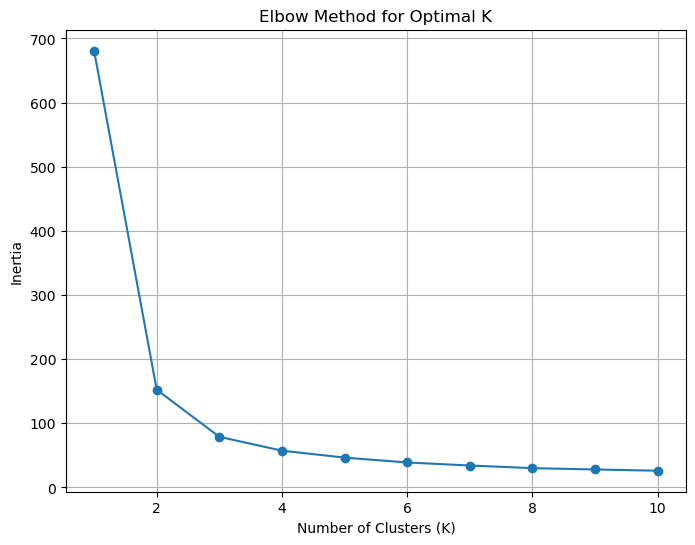

In [32]:

# Create an empty list to store inertia values
inertia = []

# Define a range of K values to test
k_values = range(1, 11)

# Fit K-Means clustering for each K value and calculate inertia
for k in k_values:
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(clustering_data)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method results
plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.grid()
plt.show()

### As k increases, inertia generally decreases.
### The graph shows a rapid decline in inertia from k=1 to 3 and then a slower decline beyond k=3.
### The "elbow" point is where the inertia reduction slows significantly, suggesting diminishing returns in clustering quality.
### In this analysis, the elbow point occurs at k=3.

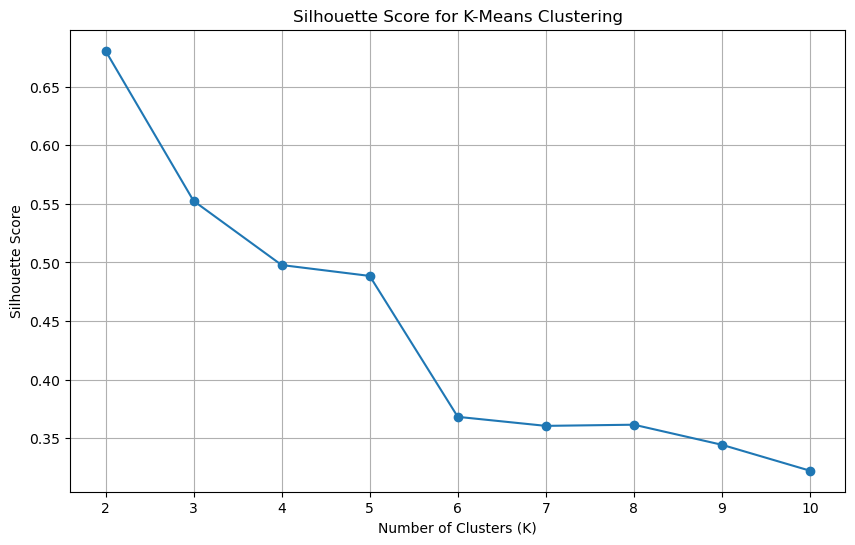

In [35]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

silhouette_scores = []

# Define a range of K values for the number of clusters
k_values = range(2, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
    cluster_labels = kmeans.fit_predict(clustering_data)
    silhouette_avg = silhouette_score(clustering_data, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot the Silhouette Score results
plt.figure(figsize=(10, 6))
plt.plot(k_values, silhouette_scores, marker='o', linestyle='-')
plt.title('Silhouette Score for K-Means Clustering')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()


Determining the Optimal Number of Clusters (K)

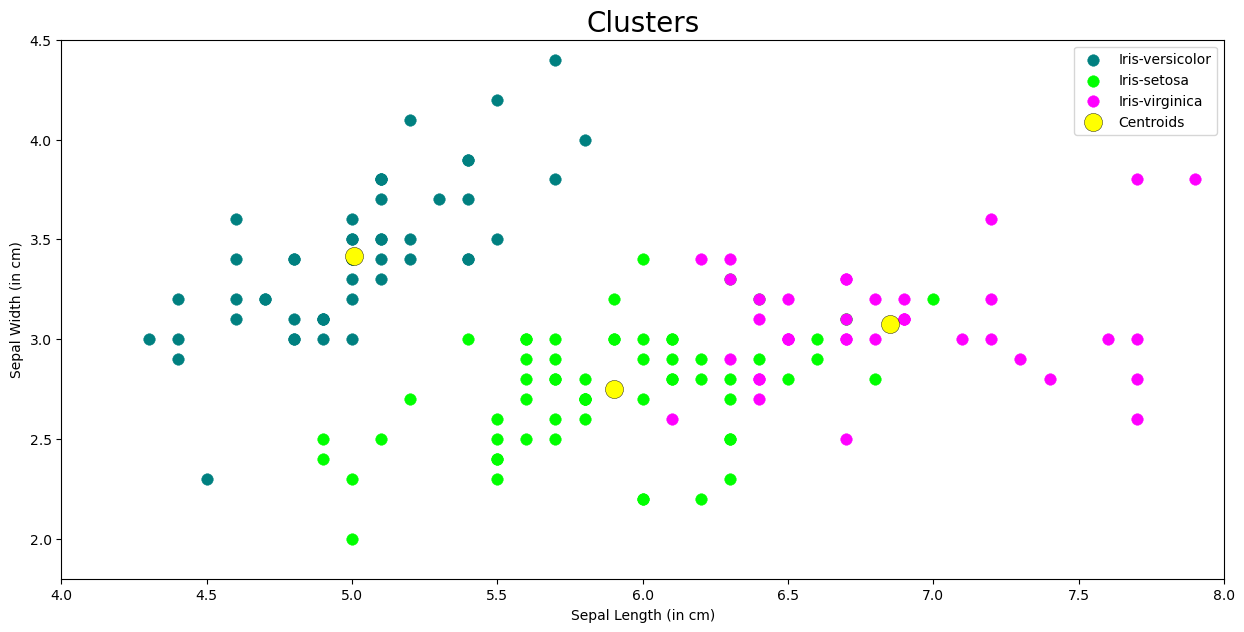

In [42]:
fig, ax = plt.subplots(figsize=(15,7)) 
plt.scatter(x=clusters[clusters['Cluster_Prediction'] == 0]['SepalLengthCm'],
            y=clusters[clusters['Cluster_Prediction'] == 0]['SepalWidthCm'],
            s=70,edgecolor='teal', linewidth=0.3, c='teal', label='Iris-versicolor')


plt.scatter(x=clusters[clusters['Cluster_Prediction'] == 1]['SepalLengthCm'],
            y=clusters[clusters['Cluster_Prediction'] == 1]['SepalWidthCm'],
            s=70,edgecolor='lime', linewidth=0.3, c='lime', label='Iris-setosa')


plt.scatter(x=clusters[clusters['Cluster_Prediction'] == 2]['SepalLengthCm'],
            y=clusters[clusters['Cluster_Prediction'] == 2]['SepalWidthCm'],
            s=70,edgecolor='magenta', linewidth=0.3, c='magenta', label='Iris-virginica')

plt.scatter(x=kms.cluster_centers_[:, 0], y=kms.cluster_centers_[:, 1], s = 170, c = 'yellow', label = 'Centroids',edgecolor='black', linewidth=0.3)
plt.legend(loc='upper right')
plt.xlim(4,8)
plt.ylim(1.8,4.5)
ax.set_ylabel('Sepal Width (in cm)')
ax.set_xlabel('Sepal Length (in cm)')
plt.title('Clusters', fontsize = 20)
plt.show()